In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [3]:
# Prepare dataset
from google.colab import files
uploaded = files.upload()

Saving mall_customer.csv to mall_customer.csv


In [4]:
# Load dataset
customer_df = pd.read_csv('mall_customer.csv')

customer_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
CustomerID,1,2,3,4,5,6,7,8,9,10
Gender,Male,Male,Female,Female,Female,Female,Female,Female,Male,Female
Age,19,21,20,23,31,22,35,23,64,30
Annual Income (k$),15,15,16,16,17,17,18,18,19,19
Spending Score (1-100),39,81,6,77,40,76,6,94,3,72


In [8]:
# Mengambil kolom Annual Income dan Spending Score
col_name = ["Annual Income (k$)",  "Spending Score (1-100)"]
data = customer_df[col_name]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [9]:
# Melakukan standarisasi data
data_standardized = (data - data.mean()) / data.std()

# Menampilkan data yang telah di-standarisasi
data_standardized

,Annual Income (k$),Spending Score (1-100)
0,-1.734646,-0.433713
1,-1.734646,1.192711
2,-1.696572,-1.711618
3,-1.696572,1.037814
4,-1.658498,-0.394989
...,...,...
195,2.263112,1.115262
196,2.491555,-0.859681
197,2.491555,0.921640
198,2.910368,-1.246925


In [11]:
# Menentukan nilai k
k_range = range(2, 10)

# Menentukan nilai k yang paling optimal dengan menggunakan metode silhouette
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(data_standardized)
    score = silhouette_score(data_standardized, labels)
    print("k = {}, silhouette score = {}".format(k, score))

k = 2, silhouette score = 0.29512063001573885
k = 3, silhouette score = 0.46658474418951357
k = 4, silhouette score = 0.493906923750703
k = 5, silhouette score = 0.5546571631100152
k = 6, silhouette score = 0.5398800926779724
k = 7, silhouette score = 0.5256026931607839
k = 8, silhouette score = 0.45317028375649604
k = 9, silhouette score = 0.4554774605855397


In [12]:
def cluster_assignment(x, z):
    """
    Fungsi untuk melakukan cluster assignment pada seluruh data (n 2-vector) 

    Parameter
    ---------
        x : vector (annual income, spending score)
            kumpulan vektor titik yang ingin di cluster. Berukuran n 2-vector dengan banyak data n
        z : vector (annual income, spending score)
            kumpulan vektor centroid. Berukuran k 2-vector dengan banyak centroid adalah k

    Return
    -------
        c : vector
            kumpulan data alamat cluster dari seluruh data. Berukuran n-vector.
    """    
    n = len(x)
    k = len(z)

    c = np.zeros(n)
    for i in range(n):
        list_distance = np.zeros(k)
        for j in range(k):
            list_distance[j] = np.linalg.norm(x[i] - z[j])

        c[i] = np.argmin(list_distance)+1

    return c

In [13]:
def update_centroid(x, z, c):
    """
    Fungsi untuk mengupdate posisi centroid.
    Centroid didefinisikan sebagai rataan seluruh titik yang berada pada clusternya.

    Parameter
    ---------
        x : vector (annual income, spending score)
            kumpulan vektor titik yang ingin di cluster. Berukuran n 2-vector dengan banyak data n
        z : vector (annual income, spending score)
            kumpulan vektor centroid. Berukuran k 2-vector dengan banyak centroid adalah k
        c : vector
            kumpulan data alamat cluster dari seluruh data. Berukuran n-vector.

    Return
    -------
        new_z : vector (annual income, spending score)
                kumpulan vektor centroid yang sudah diupdate. 
                Berukuran k 2-vector dengan banyak centroid adalah k
    """
    n = len(x)
    k = len(z)

    new_z = np.zeros((k, 2))

    for j in range(k):
        x_in_cluster_j = x[c-1 == j]
        new_z[j, :] = np.mean(x_in_cluster_j, axis=0)

    return new_z

In [14]:
def clustering_objective(x, z, c):
    """
    Fungsi untuk menghitung clustering objective

    Parameter
    ---------
        x : vector (annual income, spending score)
            kumpulan vektor titik yang ingin di cluster. Berukuran n 2-vector dengan banyak data n
        z : vector (annual income, spending score)
            kumpulan vektor centroid. Berukuran k 2-vector dengan banyak centroid adalah k
        c : vector
            kumpulan data alamat cluster dari seluruh data. Berukuran n-vector.

    Return
    -------
        J_obj : float
                Clustering objective. 
    """
    n = len(x)
    k = len(z)

    # Cari jumlah clustering objective
    J_obj = 0
    for i in range(n):
        J_obj += (np.linalg.norm(x[i] - z[int(c[i]-1)]))**2

    # Cari rataannya
    J_obj = J_obj / n

    return J_obj

    return J_obj


In [15]:
def kmeans_algo(x, z, epsilon=1e-6):
    """
    Fungsi untuk melakukan k-means clustering

    Parameter
    ---------
        x       : vector (annual income, spending score)
                  kumpulan vektor titik yang ingin di cluster. Berukuran n 2-vector dengan banyak data n
        z       : vector (annual income, spending score)
                  kumpulan vektor centroid. Berukuran k 2-vector dengan banyak centroid adalah k
        epsilon : float
                  Angka kecil yang jadi batas distance antara vektor centroid lama & baru

    Return
    -------
        new_z           : vector (annual income, spending score)
                          kumpulan vektor centroid baru. Berukuran k 2-vector dengan banyak centroid adalah k
        c               : vektor 
                          kumpulan data yang berisi alamat cluster pada masing-masing titik
        J_clust_history : vektor
                          kumpulan data yang berisi update clustering objective untuk tiap iterasinya
        iteration       : int
                          iterasi maksimum yang dilakukan
    """
      # Inisialisasi untuk monitoring
    iteration = 0
    J_obj_history = []
    stop_iteration = False

    # Mulai perulangan
    while stop_iteration == False:
        # a. Assign cluster
        c = cluster_assignment(x, z)

        # b. Update centroid
        new_z = update_centroid(x, z, c)

        # Untuk monitoring
        J_obj = clustering_objective(x, new_z, c)     # Hitung clustering objective
        J_obj_history.append(J_obj)                 # Simpan clustering objective
        iteration += 1                                  # Update iterasi

        # c. Check stopping criteria
        if np.linalg.norm(new_z - z) < epsilon:
            stop_iteration = True
        else:
            z = new_z           # Update nilai centroid

    return new_z, c, J_obj_history, iteration


In [17]:
# Buat data input (x)
x= data_standardized[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

# Buat centroid (z)
z = np.array([[-1, -1],
              [-1, 1],
              [0, 0],
              [ 1, -1],
              [1, 1]])

# Lakukan clustering
new_z, c, J_obj_history, iteration = kmeans_algo(x, z)  

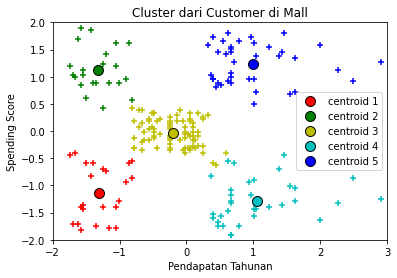

centroids:
centroid-1 : [-1.3  -1.13]
centroid-2 : [-1.33  1.13]
centroid-3 : [-0.2  -0.03]
centroid-4 : [ 1.05 -1.28]
centroid-5 : [0.99 1.24]


In [18]:
# Plot Final
for i in range(len(c)):
    if c[i] == 1:
        plt.scatter(x[i,0], x[i,1], c='r', marker='+')
    elif c[i] == 2:
        plt.scatter(x[i,0], x[i,1], c='g', marker='+')
    elif c[i] == 3:
        plt.scatter(x[i,0], x[i,1], c='y', marker='+')
    elif c[i] == 4:
        plt.scatter(x[i,0], x[i,1], c='c', marker='+')
    else:
        plt.scatter(x[i,0], x[i,1], c='b', marker='+')

plt.scatter(new_z[0,0], new_z[0,1], c='r', edgecolor='k', s=100, label='centroid 1')
plt.scatter(new_z[1,0], new_z[1,1], c='g', edgecolor='k', s=100, label='centroid 2')
plt.scatter(new_z[2,0], new_z[2,1], c='y', edgecolor='k', s=100, label='centroid 3')
plt.scatter(new_z[3,0], new_z[3,1], c='c', edgecolor='k', s=100, label='centroid 4')
plt.scatter(new_z[4,0], new_z[4,1], c='b', edgecolor='k', s=100, label='centroid 5')

plt.xlim(-2, 3)
plt.ylim(-2, 2)
plt.title('Cluster dari Customer di Mall')
plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

print(f'centroids:')
for i in range(len(new_z)):
    print(f'centroid-{i+1} : {np.round(new_z[i], 2)}')